<a href="https://colab.research.google.com/github/vijay9119y/Internsavy_Projects/blob/main/Task-4-Cricket_Player_Performance_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries and Datasets**#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bats_df = pd.read_csv('Batsman_Data.csv')
bats_df

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,11145,46,46,61,75.40,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11145,11146,3,3,6,50.00,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11146,11147,1,1,8,12.50,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048
11147,11148,DNB,-,-,-,-,-,v Scotland,Edinburgh,10 May 2019,ODI # 4131,Gulbadin Naib,352048


In [3]:
bowl_df = pd.read_csv('Bowler_data.csv')
bowl_df

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11114,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Gulbadin Naib,352048
11114,11115,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11115,11116,-,-,-,-,-,-,-,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11116,11117,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048


In [4]:
ground_df = pd.read_csv('Ground_Averages.csv')
ground_df.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [5]:
match_results = pd.read_csv('ODI_Match_Results.csv')
match_results

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1317,997,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1318,282,aban,-,NaN,-,-,v Scotland,Edinburgh,18 May 2019,ODI # 4138a,SriLanka,8
1319,1322,-,-,NaN,won,2nd,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1320,559,-,-,NaN,lost,2nd,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


In [6]:
match_totals = pd.read_csv('ODI_Match_Totals.csv')
match_totals

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7
1292,979,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1293,1296,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1294,550,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


In [7]:
wc_player = pd.read_csv('WC_players.csv')
wc_player

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan
...,...,...,...
147,Ashley Nurse,315594,WestIndies
148,Nicholas Pooran (wk),604302,WestIndies
149,Kemar Roach,230553,WestIndies
150,Andre Russell,276298,WestIndies


In [8]:
bats_df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [9]:
bowl_df.isnull().sum()

Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64

In [10]:
ground_df.isnull().sum()

Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64

In [11]:
match_results.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [12]:
match_totals.isnull().sum()

Unnamed: 0      0
Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [13]:
wc_player.isnull().sum()

Player     0
ID         0
Country    0
dtype: int64

In [14]:
bats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [15]:
bowl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11118 non-null  int64 
 1   Overs       11118 non-null  object
 2   Mdns        11118 non-null  object
 3   Runs        11118 non-null  object
 4   Wkts        11118 non-null  object
 5   Econ        11118 non-null  object
 6   Ave         11118 non-null  object
 7   SR          11118 non-null  object
 8   Opposition  11118 non-null  object
 9   Ground      11118 non-null  object
 10  Start Date  11118 non-null  object
 11  Match_ID    11118 non-null  object
 12  Bowler      11118 non-null  object
 13  Player_ID   11118 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


In [16]:
ground_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ground  106 non-null    object 
 1   Span    106 non-null    object 
 2   Mat     106 non-null    int64  
 3   Won     106 non-null    int64  
 4   Tied    106 non-null    int64  
 5   NR      106 non-null    int64  
 6   Runs    106 non-null    int64  
 7   Wkts    106 non-null    int64  
 8   Balls   106 non-null    int64  
 9   Ave     106 non-null    float64
 10  RPO     106 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 9.2+ KB


In [17]:
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1322 non-null   int64  
 1   Result      1322 non-null   object 
 2   Margin      1322 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1322 non-null   object 
 5   Bat         1322 non-null   object 
 6   Opposition  1322 non-null   object 
 7   Ground      1322 non-null   object 
 8   Start Date  1322 non-null   object 
 9   Match_ID    1322 non-null   object 
 10  Country     1322 non-null   object 
 11  Country_ID  1322 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 124.1+ KB


In [18]:
match_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1296 non-null   int64  
 1   Score       1296 non-null   object 
 2   Overs       1296 non-null   float64
 3   RPO         1296 non-null   object 
 4   Target      620 non-null    float64
 5   Inns        1296 non-null   int64  
 6   Result      1296 non-null   object 
 7   Opposition  1296 non-null   object 
 8   Ground      1296 non-null   object 
 9   Start Date  1296 non-null   object 
 10  Match_ID    1296 non-null   object 
 11  Country     1296 non-null   object 
 12  Country_ID  1296 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 131.8+ KB


In [19]:
wc_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   152 non-null    object
 1   ID       152 non-null    int64 
 2   Country  152 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


In [21]:
df=[bats_df,bowl_df,ground_df,match_results,match_totals,wc_player]
def dementions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())
dementions(df)

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

In [22]:
def stat_summary(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)
stat_summary(df)

         Unnamed: 0   Bat1   Runs     BF     SR     4s     6s   Opposition  \
count   11149.00000  11149  11149  11149  11149  11149  11149        11149   
unique          NaN    323    180    163   2032     26     17           22   
top             NaN    DNB      -      -      -      0      0  v Sri Lanka   
freq            NaN   2043   2231   2231   2331   2901   6368         1283   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   

       Ground   Start Date    Match_ID    Batsman     Player_ID

In [23]:
# As our data set has start date or date column so lets first seaprate them into day, month and year wise and drop the orignal one
def seperate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)  # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")
seperate_date(df)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8

In [24]:
# Drop irrelavent columns from the datasets
def drop_irrelevant(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]

        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")
drop_irrelevant(df)

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Ko

In [25]:
df_list=[bats_df,bowl_df,ground_df,match_results,match_totals,wc_player]

In [26]:
# As we seen there are object type of data avilabe in the all the dataset so lets seaprate them and encode them into numeric form .
# lets seaprate the catogorical data & numirical data

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
      cat_col = []  # List to store categorical column names for the current DataFrame
      features = df.columns.values.tolist()

      for col in features:
          if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
              cat_col.append(col)

      cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)
    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values
label_encode_categorical_columns(df_list)
bats_df.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,319,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,319,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,319,0,0,0,0,0,9,38,764,113,49619,1,5,2010


In [27]:
bowl_df.head()

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009
2,0,0,0,0,0,0,0,9,37,762,138,49619,12,27,2009
3,55,2,66,3,406,120,70,4,38,763,138,49619,1,4,2010
4,49,2,49,1,349,0,0,9,38,764,138,49619,1,5,2010


In [28]:
ground_df.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60
2,55,6,15,15,0,0,7656,217,8482,35.28,5.41
3,76,2,2,2,0,0,1163,26,1200,44.73,5.81
4,0,6,10,10,0,0,4863,157,5645,30.97,5.16


In [29]:
match_results.head()

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6,160,NaN,1,1,5,57,0,6,7,1,3,2013
1,3,160,NaN,2,2,11,57,0,4,6,1,3,2013
2,3,3,NaN,1,2,5,29,1,6,7,1,6,2013
3,6,3,NaN,2,1,11,29,1,4,6,1,6,2013
4,3,10,NaN,1,2,1,63,2,8,8,1,11,2013


In [30]:
match_totals.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404,48.3,165,NaN,1,4,5,57,0,6,7,1,3,2013
1,115,48.0,25,251.0,2,1,11,57,0,4,6,1,3,2013
2,93,48.5,18,168.0,2,1,5,29,1,6,7,1,6,2013
3,120,43.4,48,NaN,1,4,11,29,1,4,6,1,6,2013
4,199,40.0,146,306.0,2,1,1,63,2,8,8,1,11,2013


In [31]:
wc_player.head()

,Player,ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0


In [32]:
match_results.isnull().sum()


Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [33]:
match_totals.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [34]:
imputer = IterativeImputer()
df_list2 = [match_results,match_totals]

def treat_missing_value(df_list2):
    for i in range(len(df_list2)):
        df_imputed = imputer.fit_transform(df_list2[i])
        df_list2[i] = pd.DataFrame(df_imputed, columns=df_list2[i].columns)
        print("DataFrame", i, "after imputation:")
        print(df_list2[i].isnull().sum()) #Lets Check the Values treated well or not
        print("-------------------------")
treat_missing_value(df_list2)

DataFrame 0 after imputation:
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------
DataFrame 1 after imputation:
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------


In [35]:
match_totals=df_list2[0]
match_results=df_list2[1]
bats_df

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,319,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,319,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,319,0,0,0,0,0,9,38,764,113,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,203,121,121,1409,22,2,10,36,1809,42,352048,2,28,2019
11145,167,103,119,969,1,1,10,36,1810,42,352048,3,2,2019
11146,2,2,141,330,1,1,10,36,1817,42,352048,3,8,2019
11147,319,0,0,0,0,0,16,46,1834,42,352048,5,10,2019


In [36]:
bowl_df

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009
2,0,0,0,0,0,0,0,9,37,762,138,49619,12,27,2009
3,55,2,66,3,406,120,70,4,38,763,138,49619,1,4,2010
4,49,2,49,1,349,0,0,9,38,764,138,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,25,1,42,1,35,0,0,9,40,1758,42,352048,9,25,2018
11114,45,1,19,3,112,5,60,10,36,1809,42,352048,2,28,2019
11115,0,0,0,0,0,0,0,10,36,1810,42,352048,3,2,2019
11116,37,1,20,2,171,80,83,10,36,1817,42,352048,3,8,2019


In [37]:
ground_df

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60
2,55,6,15,15,0,0,7656,217,8482,35.28,5.41
3,76,2,2,2,0,0,1163,26,1200,44.73,5.81
4,0,6,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,32,18,1,1,0,0,209,11,280,19.00,4.47
102,90,18,1,1,0,0,400,11,531,36.36,4.51
103,70,19,5,4,0,1,1864,67,2524,27.82,4.43
104,100,19,1,1,0,0,307,17,474,18.05,3.88


In [38]:
#Lets Create a master dataset and the build the model
# so first we are going to merge 2 dataset and then further
batsman_join_bowler=pd.merge(bats_df,bowl_df,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Day,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler
0,319,0,0,0,0,0,9,92,759,113,...,18,2009,49,1,59,1,412,0,0,138
1,319,0,0,0,0,0,9,78,761,113,...,24,2009,12,1,57,3,316,103,77,138
2,319,0,0,0,0,0,9,37,762,113,...,27,2009,0,0,0,0,0,0,0,138
3,319,0,0,0,0,0,4,38,763,113,...,4,2010,55,2,66,3,406,120,70,138
4,319,0,0,0,0,0,9,38,764,113,...,5,2010,49,2,49,1,349,0,0,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,99,57,104,826,2,1,9,40,1758,42,...,25,2018,25,1,42,1,35,0,0,42
11114,203,121,121,1409,22,2,10,36,1809,42,...,28,2019,45,1,19,3,112,5,60,42
11115,167,103,119,969,1,1,10,36,1810,42,...,2,2019,0,0,0,0,0,0,0,42
11116,2,2,141,330,1,1,10,36,1817,42,...,8,2019,37,1,20,2,171,80,83,42


In [39]:
batsman_join_bowler.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Bowler'],
      dtype='object')

In [40]:
bowl_df.columns

Index(['Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR', 'Opposition',
       'Ground', 'Match_ID', 'Bowler', 'Player_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [41]:
#Lets Join ground_df
batsman_join_bowler_GrondAvg=pd.merge(batsman_join_bowler,ground_df,on=['Ground'], how='inner')
batsman_join_bowler_GrondAvg

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,319,0,0,0,0,0,9,92,759,113,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,12,7,21,1757,24,10,9,92,84,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,217,128,104,240,3,1,9,92,391,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,184,111,81,572,20,1,9,92,759,11,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,319,0,0,0,0,0,9,92,927,25,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,217,128,117,1780,22,2,10,36,1817,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,180,109,84,389,13,9,10,36,1819,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,203,121,121,1409,22,2,10,36,1809,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,167,103,119,969,1,1,10,36,1810,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [42]:
batsman_join_bowler_GrondAvg.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO'],
      dtype='object')

In [43]:
match_results.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Ground', 'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [44]:
match_totals.columns

Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition', 'Ground',
       'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [45]:
#Lets Join match_results & match_totals
OD_Total_result=pd.merge(match_results,match_totals,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Score,Overs,RPO,Target,Inns,Result_x,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,404.0,48.3,165.0,241.723435,1.0,4.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0,6.0,160.0,52.000182,1.0,1.0,0.0
1,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0,3.0,160.0,52.728414,2.0,2.0,0.0
2,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0,3.0,3.0,20.689046,1.0,2.0,1.0
3,120.0,43.4,48.0,176.027214,1.0,4.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0,6.0,3.0,21.548194,2.0,1.0,1.0
4,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0,3.0,10.0,19.527705,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,750.0,50.0,309.0,382.947700,1.0,1.0,3.0,72.0,739.0,6.0,7.0,5.0,17.0,2019.0,3.0,99.0,3.000000,1.0,1.0,755.0
1292,753.0,49.3,315.0,341.000000,2.0,4.0,11.0,72.0,739.0,3.0,1.0,5.0,17.0,2019.0,6.0,99.0,3.000000,2.0,2.0,755.0
1293,27.0,33.0,38.0,211.000000,2.0,0.0,6.0,7.0,740.0,0.0,40.0,5.0,19.0,2019.0,0.0,0.0,32.327406,2.0,2.0,757.0
1294,187.0,31.5,249.0,352.000000,2.0,0.0,3.0,60.0,741.0,6.0,7.0,5.0,19.0,2019.0,0.0,0.0,29.815762,1.0,2.0,758.0


In [46]:
#Lets Join batsman_join_bowler_GrondAvg & OD_Total_result
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GrondAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Opposition_y,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,140,86,14,677,1,1,15,1,1225,113,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
1,140,86,14,677,1,1,15,1,1225,113,...,14.0,123.0,6.0,7.0,6.0,154.0,53.000000,1.0,2.0,126.0
2,0,1,108,1,1,1,15,1,1225,80,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
3,0,1,108,1,1,1,15,1,1225,80,...,14.0,123.0,6.0,7.0,6.0,154.0,53.000000,1.0,2.0,126.0
4,277,158,141,4,2,1,15,1,1225,78,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,191,115,131,1056,2,2,10,36,1819,99,...,14.0,719.0,7.0,3.0,6.0,144.0,63.153507,1.0,1.0,733.0
1040,284,161,16,1375,22,9,10,36,1819,13,...,13.0,719.0,8.0,8.0,3.0,144.0,62.762323,2.0,2.0,733.0
1041,284,161,16,1375,22,9,10,36,1819,13,...,14.0,719.0,7.0,3.0,6.0,144.0,63.153507,1.0,1.0,733.0
1042,180,109,84,389,13,9,10,36,1819,117,...,13.0,719.0,8.0,8.0,3.0,144.0,62.762323,2.0,2.0,733.0


In [47]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y'],
      dtype='object')

In [48]:
wc_player=wc_player.rename(columns={'ID':'Player_ID'})

In [49]:
#Lets Join batsman_join_bowler_GrondAvg_OD & wc_player
master_after_join=pd.merge(batsman_join_bowler_GrondAvg_OD,wc_player,on=['Player_ID','Country'], how='inner')
master_after_join

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player
0,0,1,108,1,1,1,15,1,1225,80,...,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0,80
1,0,1,2,1,1,1,15,1,1227,80,...,125.0,8.0,8.0,6.0,73.0,2.000000,1.0,2.0,128.0,80
2,2,2,130,518,1,1,0,1,1750,80,...,648.0,8.0,8.0,3.0,167.0,67.891460,1.0,2.0,662.0,80
3,319,0,0,0,0,0,3,2,1106,80,...,4.0,8.0,8.0,6.0,154.0,59.000000,2.0,2.0,4.0,80
4,277,158,141,4,2,1,15,1,1225,78,...,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,319,0,0,0,0,0,13,5,1590,9,...,488.0,7.0,3.0,6.0,131.0,106.000000,2.0,2.0,501.0,9
506,154,96,109,946,18,1,17,5,1590,93,...,488.0,5.0,5.0,3.0,131.0,106.000000,1.0,1.0,501.0,94
507,5,3,130,535,13,1,15,5,1485,93,...,383.0,5.0,5.0,6.0,99.0,2.000000,1.0,2.0,393.0,94
508,255,147,74,849,1,1,3,5,1574,93,...,472.0,5.0,5.0,6.0,130.0,57.891035,1.0,1.0,484.0,94


In [50]:
# Calculate Batting Average for each player
master_after_join['Batting Average'] = master_after_join['Bat1'] / master_after_join['Inns']
# Display the Batting Average for each player
print(master_after_join[['Player', 'Batting Average']])

     Player  Batting Average
0        80              0.0
1        80              0.0
2        80              1.0
3        80            159.5
4        78            277.0
..      ...              ...
505       9            159.5
506      94            154.0
507      94              2.5
508      94            255.0
509      94            180.0

[510 rows x 2 columns]


In [51]:
# Calculate Bowling Average for each player
master_after_join['Bowling Average'] = master_after_join['Runs_y'] / master_after_join['Wkts_y']

# Display the Bowling Average for each player
print(master_after_join[['Player', 'Bowling Average']])

     Player  Bowling Average
0        80         2.733333
1        80         3.933333
2        80         4.600000
3        80         0.941176
4        78         0.000000
..      ...              ...
505       9         0.729167
506      94         1.979167
507      94         1.208333
508      94         0.937500
509      94         0.020833

[510 rows x 2 columns]


In [52]:
# Filter out rows with zero or missing values in 'BF'
master_after_join = master_after_join[master_after_join['BF'] > 0]
master_after_join.head(5)

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average
0,0,1,108,1,1,1,15,1,1225,80,...,8.0,3.0,154.0,53.00000,2.0,1.0,126.0,80,0.0,2.733333
1,0,1,2,1,1,1,15,1,1227,80,...,8.0,6.0,73.0,2.00000,1.0,2.0,128.0,80,0.0,3.933333
2,2,2,130,518,1,1,0,1,1750,80,...,8.0,3.0,167.0,67.89146,1.0,2.0,662.0,80,1.0,4.600000
4,277,158,141,4,2,1,15,1,1225,78,...,8.0,3.0,154.0,53.00000,2.0,1.0,126.0,78,277.0,0.000000
5,205,122,99,256,18,11,15,1,1227,78,...,8.0,6.0,73.0,2.00000,1.0,2.0,128.0,78,102.5,0.000000


In [53]:
# Calculate Strike Rate (Batting) for each player
master_after_join['Strike Rate (Batting)'] = (master_after_join['Bat1'] / master_after_join['BF']) * 100

# Display the Strike Rate (Batting) for each player
print(master_after_join[['Player', 'Strike Rate (Batting)']])

     Player  Strike Rate (Batting)
0        80               0.000000
1        80               0.000000
2        80               1.538462
4        78             196.453901
5        78             207.070707
..      ...                    ...
502      57             200.970874
506      94             141.284404
507      94               3.846154
508      94             344.594595
509      94             187.500000

[444 rows x 2 columns]


In [54]:
# Calculate Economy Rate (Bowling) for each player
master_after_join['Economy Rate (Bowling)'] = (master_after_join['Runs_y'] / master_after_join['Overs_y'])

# Display the Economy Rate (Bowling) for each player
print(master_after_join[['Player', 'Economy Rate (Bowling)']])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]


In [55]:
# Calculate the total Maiden Overs for each player
master_after_join['Maiden Overs Total'] = master_after_join['Mdns'].sum()

# Display the total Maiden Overs for each player
print(master_after_join[['Player', 'Maiden Overs Total']])

     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [56]:
# Step 1: Choose relevant performance metrics
batting_average = master_after_join['Batting Average']
bowling_average = master_after_join['Bowling Average']
strike_rate_batting = master_after_join['Strike Rate (Batting)']
economy_rate_bowling = master_after_join['Economy Rate (Bowling)']
maiden_overs = master_after_join['Maiden Overs Total']

#Step 2: Normalize the selected performance metrics
# You can use Min-Max Scaling or Z-score normalization
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN

# Step 3: Assign weights to each performance metric
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25


# Step 4: Calculate the composite performance score for each player
master_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

# Step 5: Display the Player Performance Score for each player
print(master_after_join[['Player', 'Player Performance Score']])

     Player  Player Performance Score
0        80                  0.179688
1        80                  0.256694
2        80                  0.324796
4        78                  0.267204
5        78                  0.102335
..      ...                       ...
502      57                  0.327119
506      94                  0.423807
507      94                  0.166335
508      94                  0.363639
509      94                  0.177696

[444 rows x 2 columns]


In [57]:
master_after_join.shape

(444, 55)

In [58]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

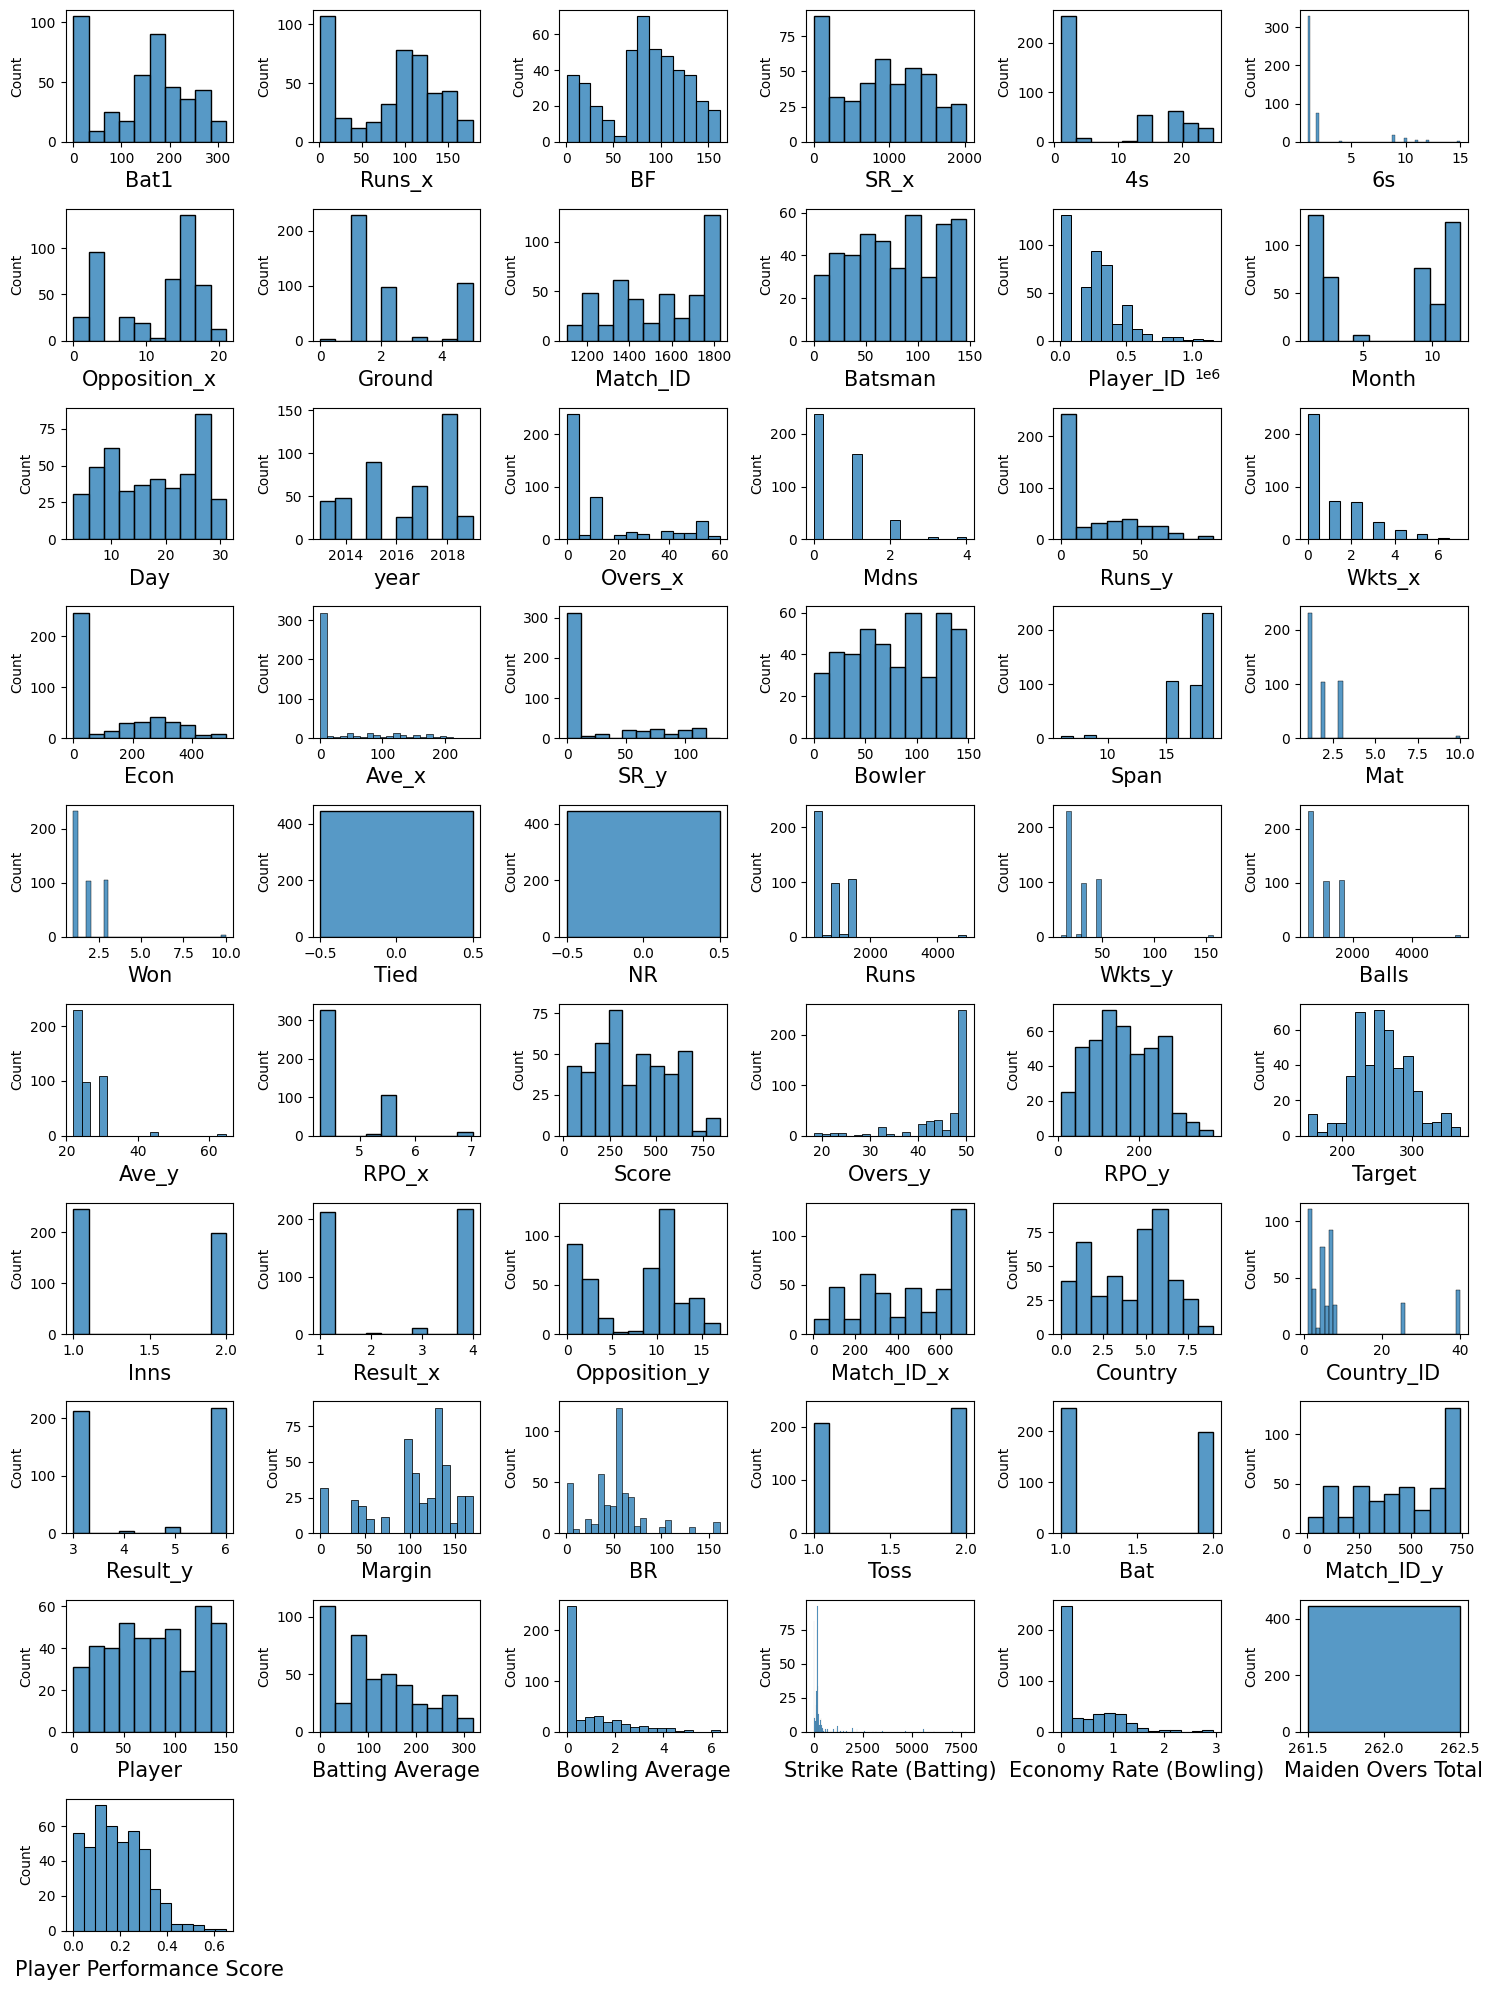

In [59]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.histplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [60]:
# From above distribution we can see there are skewed data avilabe so lets check again by using skew method
master_after_join.skew()

Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.578048
6s                          2.952126
Opposition_x               -0.516344
Ground                      0.970068
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                   0.979422
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Bowler                     -0.097655
Span                       -2.101193
Mat                         3.289249
Won                         3.289249
Tied                        0.000000
NR                          0.000000
R

In [61]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

In [62]:
# Lets Seaprate the skewed columns or featres based on above thumb rule
master_after_join.skew()[(master_after_join.skew() >= 0.5) & (master_after_join.skew() >= -0.5)]

4s                        0.578048
6s                        2.952126
Ground                    0.970068
Player_ID                 0.979422
Overs_x                   1.262778
Mdns                      1.473151
Runs_y                    1.019444
Wkts_x                    1.420556
Econ                      0.740863
Ave_x                     1.770862
SR_y                      1.372929
Mat                       3.289249
Won                       3.289249
Runs                      2.546417
Wkts_y                    2.866807
Balls                     2.933363
Ave_y                     3.219416
RPO_x                     1.697543
Country_ID                2.054187
BR                        1.052424
Bowling Average           1.558220
Strike Rate (Batting)     5.879068
Economy Rate (Bowling)    1.403963
dtype: float64

In [63]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

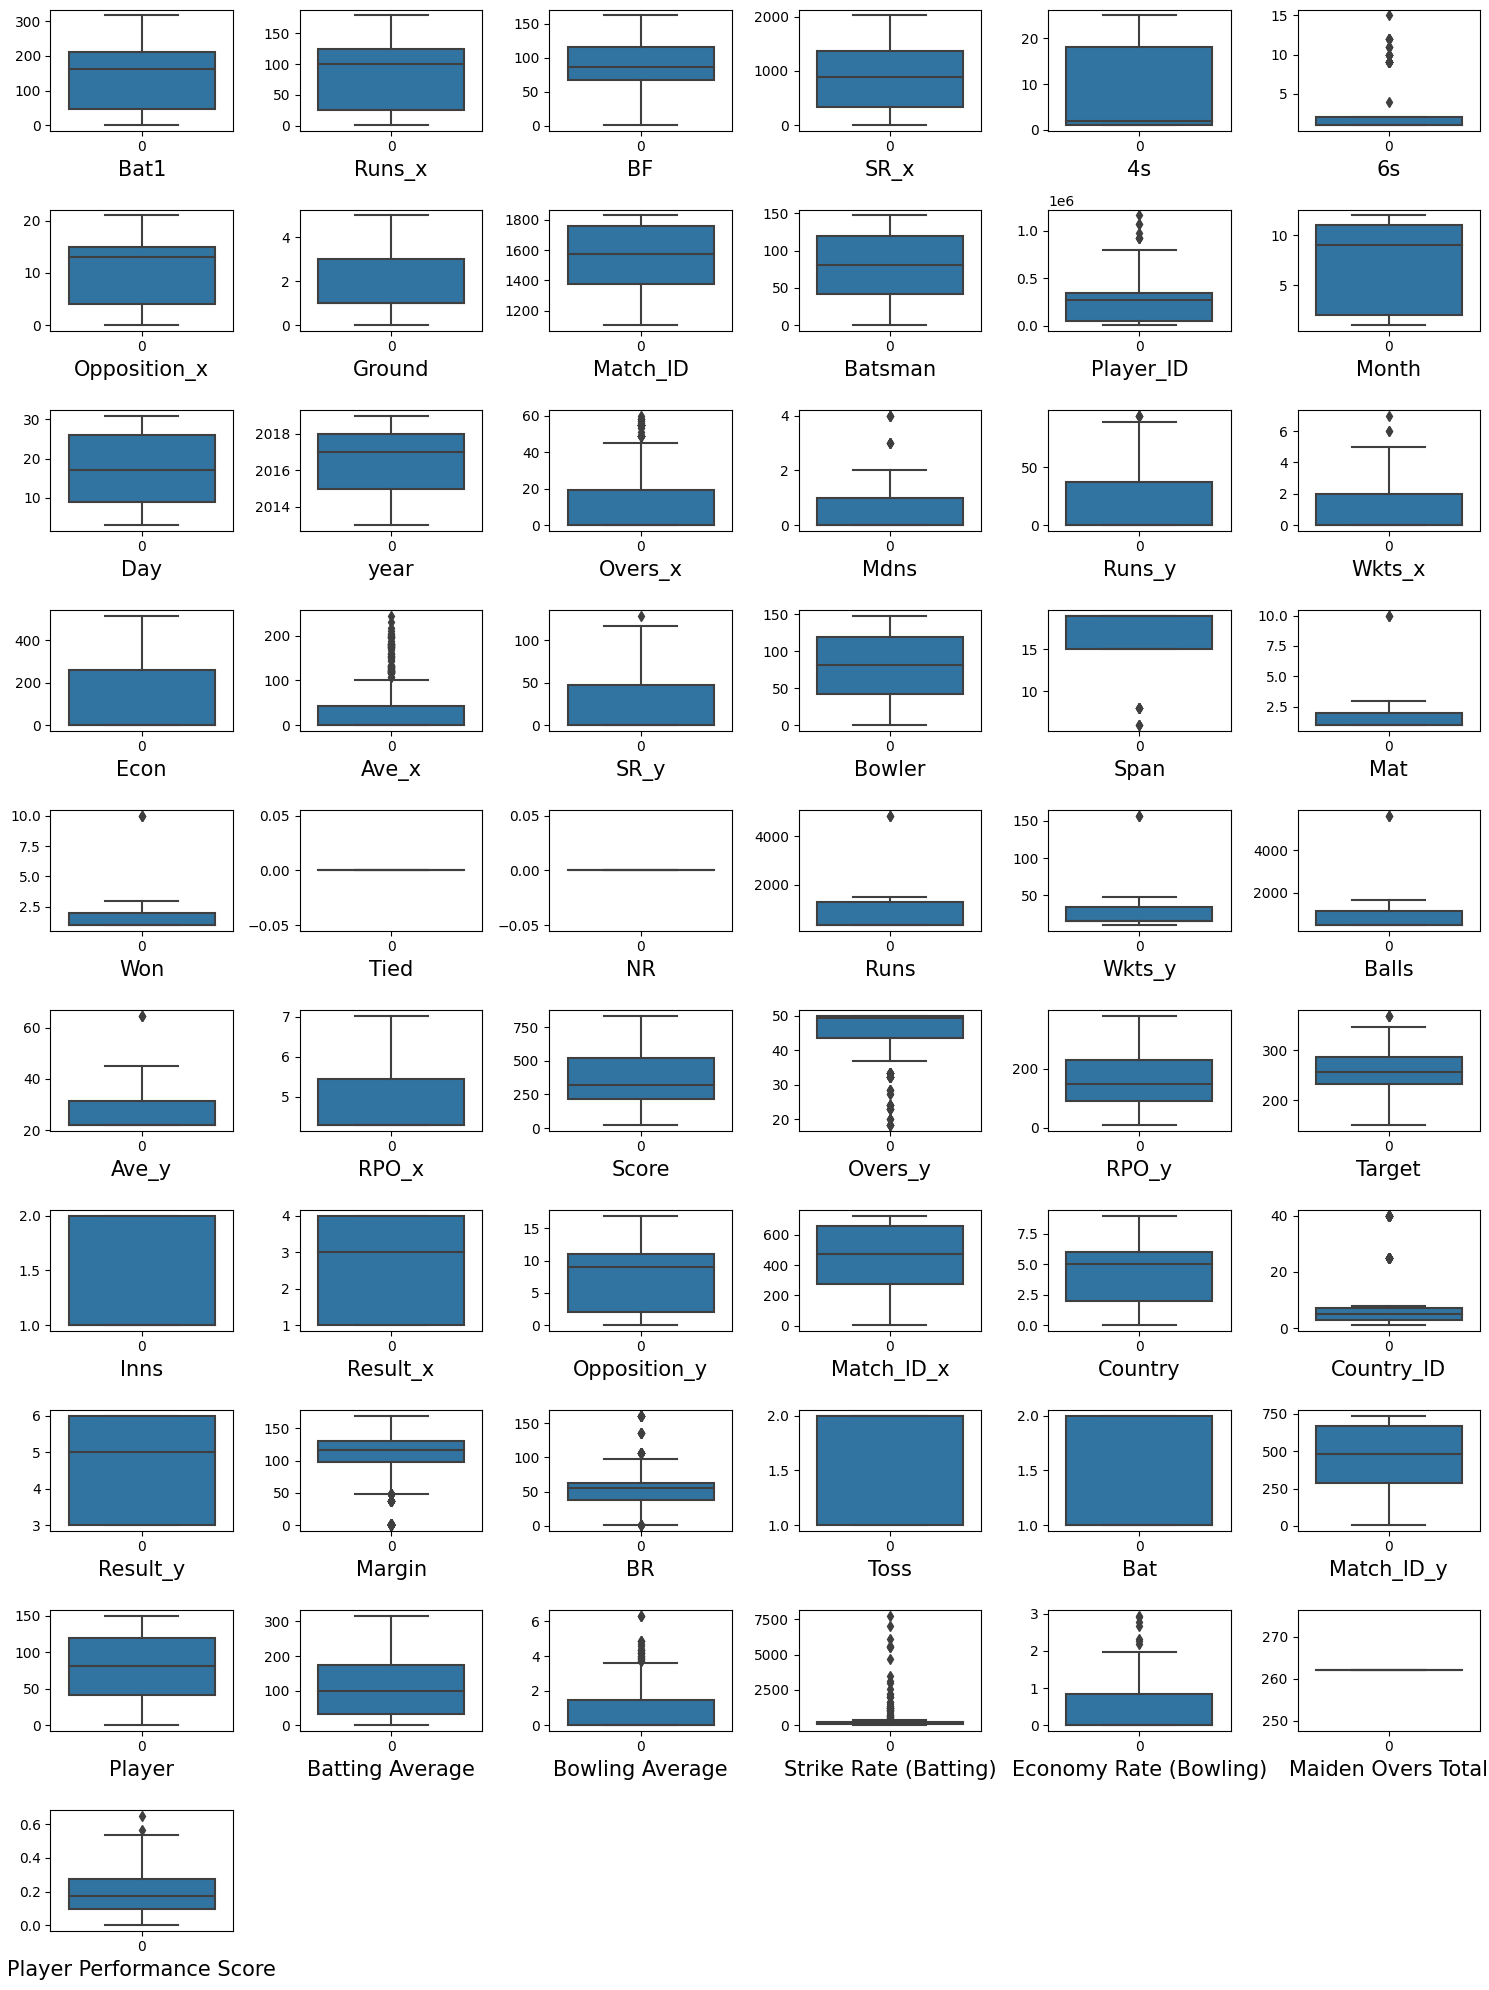

In [64]:
# Now almost All skewness we removed so move further
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [65]:
# So from graph we can see the outlier are present in the some columns so lets remove them first
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','Strike Rate (Batting)','Player Performance Score']

In [66]:
# Remove the outliers by using Z score

z_score=zscore(master_after_join[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
master_after_join=master_after_join[filter_entry]
master_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,0,1,108,1,1,1,15,1,1225,80,...,2.0,1.0,126.0,80,0.0,2.733333,0.000000,0.845361,262,0.179688
1,0,1,2,1,1,1,15,1,1227,80,...,1.0,2.0,128.0,80,0.0,3.933333,0.000000,1.194332,262,0.256694
2,2,2,130,518,1,1,0,1,1750,80,...,1.0,2.0,662.0,80,1.0,4.600000,1.538462,1.674757,262,0.324796
4,277,158,141,4,2,1,15,1,1225,78,...,2.0,1.0,126.0,78,277.0,0.000000,196.453901,0.000000,262,0.267204
5,205,122,99,256,18,11,15,1,1227,78,...,1.0,2.0,128.0,78,102.5,0.000000,207.070707,0.000000,262,0.102335


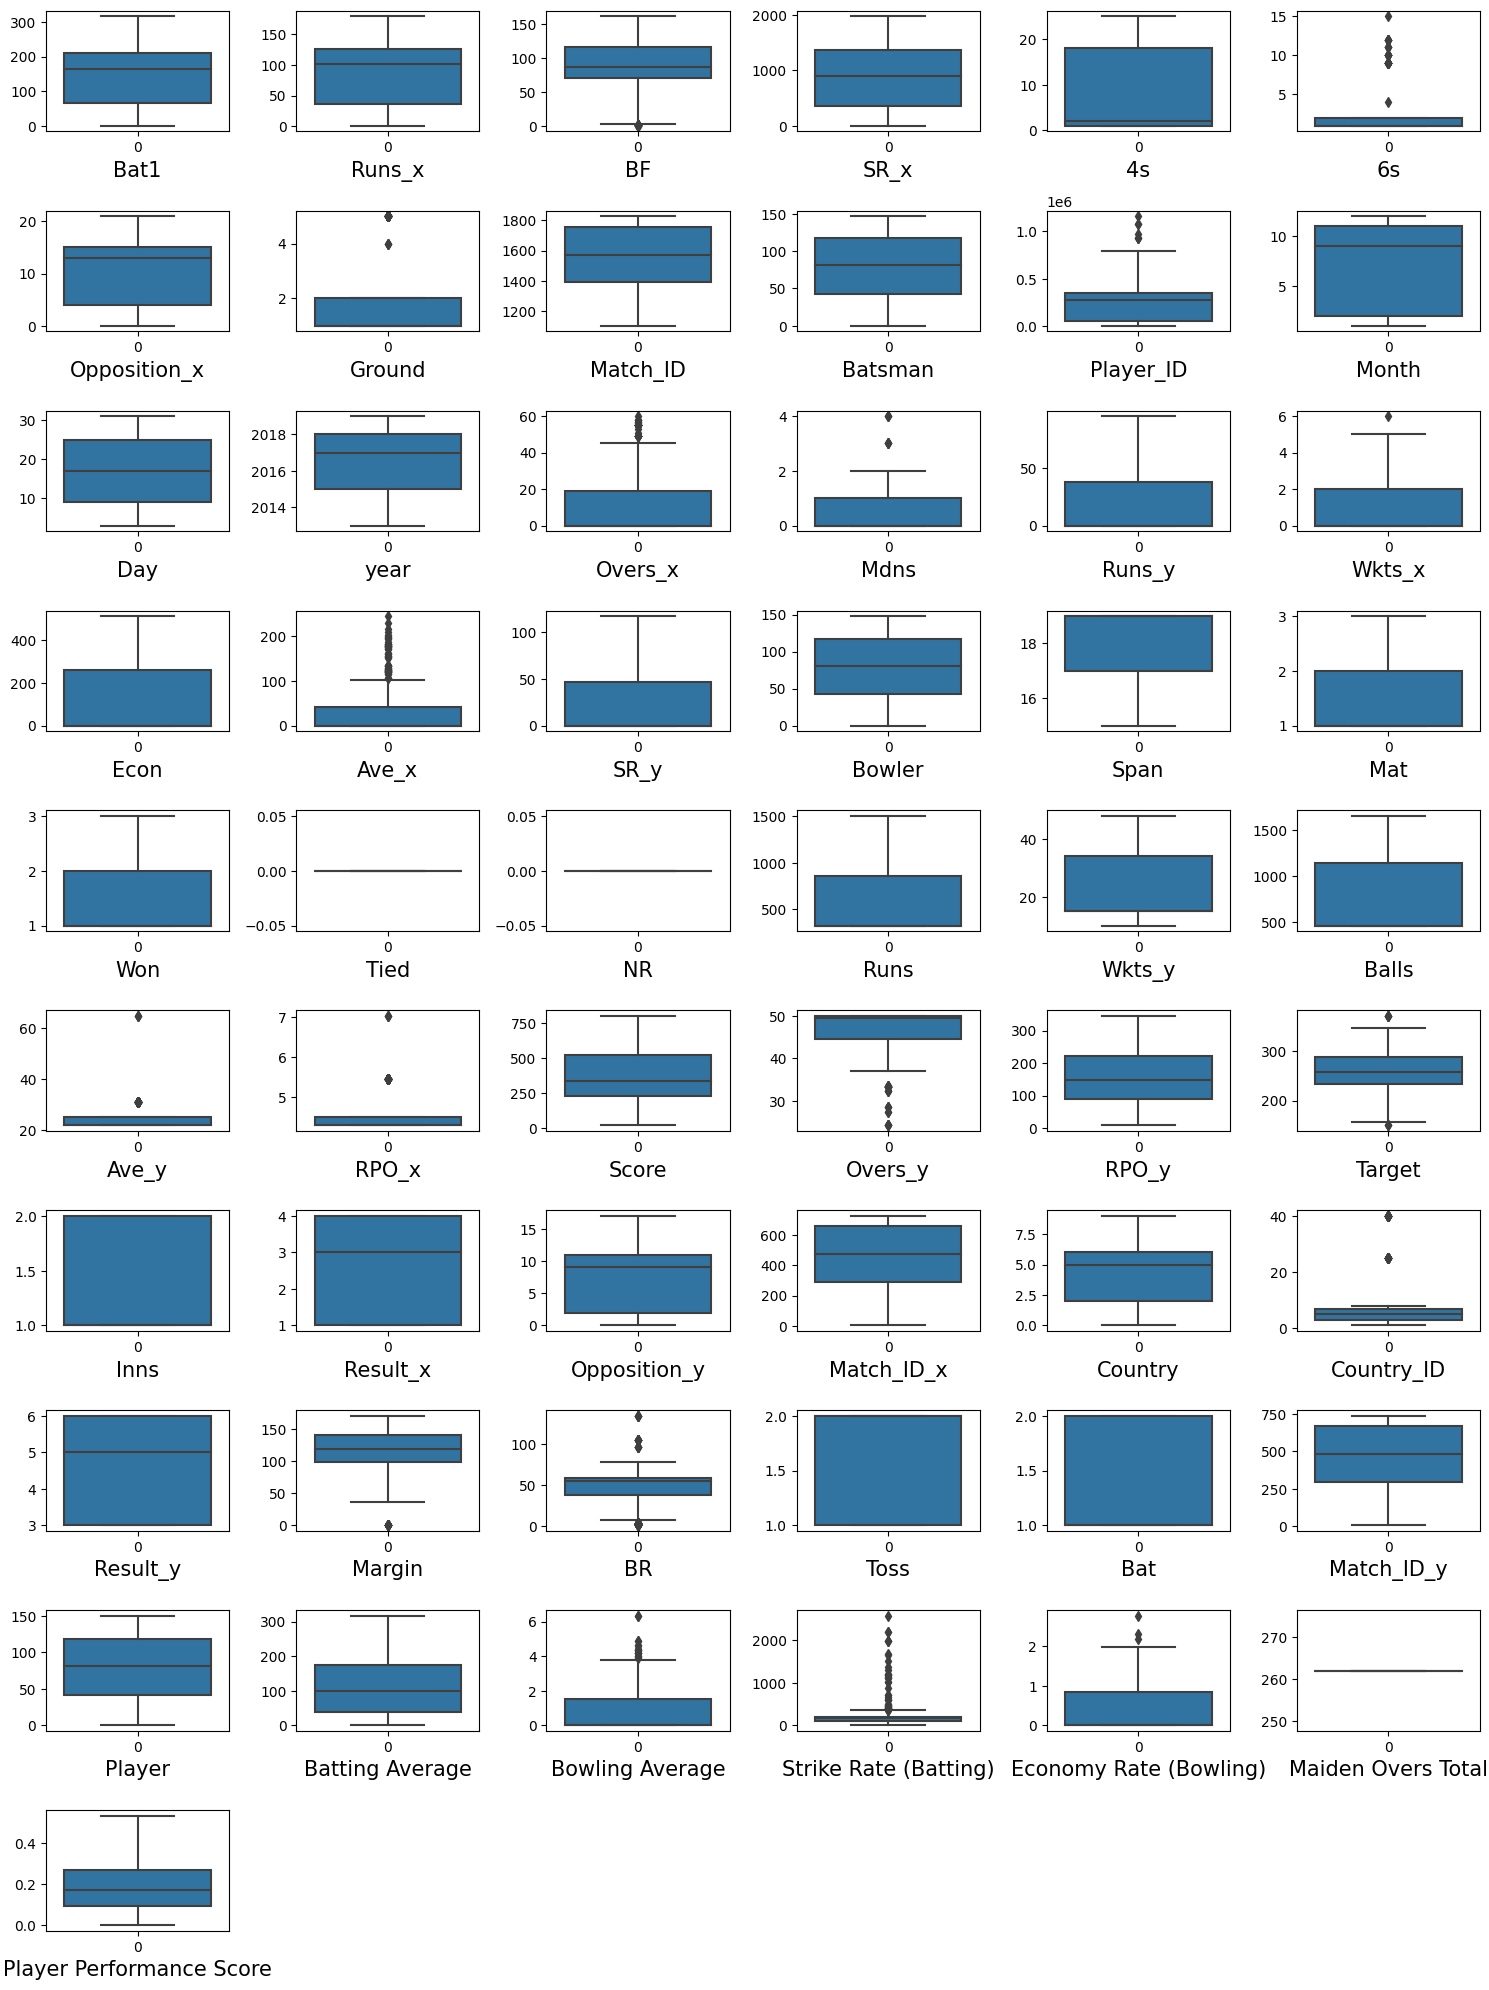

In [67]:
#Let's recheck for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [68]:
# Use 'Player Performance Score' as the target variable for the prediction model

x = master_after_join[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

y = master_after_join['Player Performance Score']  # Target column


In [69]:
print(x.shape, y.shape)

(408, 48) (408,)


In [70]:
# data stadardization

scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [71]:
#check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

             vif       featurs
0   3.236749e+02          Bat1
1   3.272782e+02        Runs_x
2   1.320922e+00            BF
3   1.307263e+00          SR_x
4   1.475799e+00            4s
5   1.323690e+00            6s
6   9.955071e+01  Opposition_x
7            inf        Ground
8            inf      Match_ID
9   3.698207e+04       Batsman
10  1.314561e+00     Player_ID
11  2.534057e+01         Month
12  1.602917e+00           Day
13  5.465632e+02          year
14  2.529241e+00       Overs_x
15  3.353339e+00          Mdns
16  4.709796e+00        Runs_y
17  3.729181e+00        Wkts_x
18  4.896810e+00          Econ
19  5.506742e+00         Ave_x
20  5.854406e+00          SR_y
21  3.697764e+04        Bowler
22           inf          Span
23           inf           Mat
24           inf           Won
25           NaN          Tied
26           NaN            NR
27           inf          Runs
28           inf        Wkts_y
29           inf         Balls
30           inf         Ave_y
31      

In [72]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[-1.71555826e+00,  4.05884099e-01,  1.85348981e+00, ...,
        -3.97695658e-16,  8.07605080e-16, -6.95300612e-18],
       [-1.69510040e+00,  1.50837618e+00,  2.17212355e+00, ...,
         1.89457050e-16, -6.32296018e-16, -8.58901164e-17],
       [-3.71259227e+00,  4.42855489e+00, -2.44666196e+00, ...,
         4.63931319e-16, -9.82256677e-17, -3.20862653e-16],
       ...,
       [ 4.50361681e+00,  3.60959401e+00,  8.73510440e-01, ...,
        -5.43946946e-17,  2.07257555e-16, -6.25898320e-17],
       [ 3.97481363e+00,  3.75290372e+00,  1.20113449e+00, ...,
        -1.87450083e-16, -1.68284408e-16, -1.08346498e-16],
       [ 4.94412302e+00,  4.68456844e-01,  7.36605342e-01, ...,
         3.25573354e-16, -1.63972999e-16,  1.61860462e-16]])

Text(0.5, 1.0, 'PCA Plot')

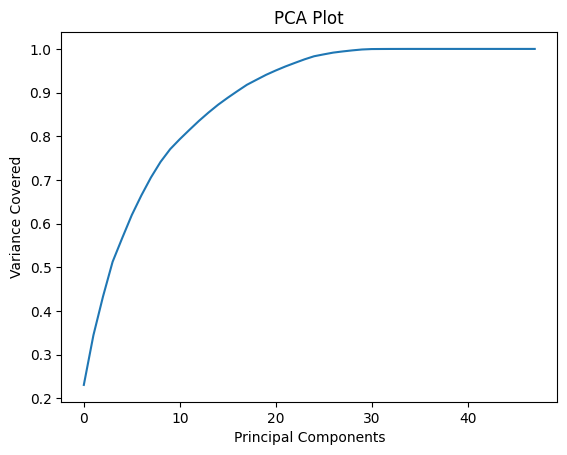

In [73]:
# Lets plot the PCA plot to select the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

In [74]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.715558,0.405884,1.853490,4.041821,0.450206,-2.955397,0.621476,1.139169,1.238982,-0.836321,1.162174,-0.401364,-0.187779,-0.422133,0.057189,-1.518510,-0.062652,1.163590,-1.156244
1,-1.695100,1.508376,2.172124,4.024685,-0.967734,-2.800127,-2.523633,-1.915688,-0.151857,0.680963,0.133825,-0.037708,0.475446,0.176649,-1.556511,0.470715,1.615023,-0.275578,-1.031961
2,-3.712592,4.428555,-2.446662,1.454384,-0.750505,-0.348771,-0.759009,-0.944424,0.021618,-1.619105,-0.209672,0.902524,-0.222268,-2.716124,1.199006,-1.087473,0.092507,0.049903,0.833417
3,-0.978327,-2.724740,1.068914,2.708875,-1.417543,-0.832131,1.534131,2.020254,0.955674,-0.772978,1.213669,1.175079,-2.165321,-0.617606,-1.239795,0.217446,-0.793116,1.163687,-0.775299
4,-0.425902,-3.345142,0.814003,2.180715,-3.359272,-1.043728,-1.480476,-1.462676,-0.961912,0.919464,2.529386,1.864371,0.423266,0.363107,-1.198708,-0.200602,-0.463910,-1.166012,-1.045293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4.264589,2.509735,0.424732,-2.362466,-0.267979,0.740181,0.607153,-1.067221,1.548211,-1.850709,0.384054,-0.387274,1.035365,1.854229,-0.881400,-0.987535,0.179824,1.344071,-1.112531
404,3.532961,2.543756,-1.597902,1.216960,2.269680,3.005442,0.781169,2.604466,0.016765,-0.442147,0.513594,0.125594,1.050503,1.954158,0.475130,-1.187265,-0.244805,0.392383,0.607496
405,4.503617,3.609594,0.873510,-0.622927,0.322380,-0.396016,-1.871963,-2.103838,-1.546398,0.745173,-0.000052,0.528785,-2.419767,0.258200,1.172513,-1.333015,0.509634,-1.073383,-0.617757
406,3.974814,3.752904,1.201134,-2.444935,-0.326141,1.403284,-0.333149,-0.480823,1.324068,-1.980160,-0.263011,0.639933,-0.240870,1.572840,-1.137106,1.149121,0.793669,0.473643,-0.384410


In [75]:
# Lets select the proper random state to build best model by using LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):

    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= i )

    lr = LinearRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data

    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data


    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.8415580290725087
at random sate 1, the testing accuracy is:- 0.8120376086455556


at random sate 2, the training accuracy is:- 0.8415580290725087
at random sate 2, the testing accuracy is:- 0.8120376086455556


at random sate 3, the training accuracy is:- 0.8415580290725087
at random sate 3, the testing accuracy is:- 0.8120376086455556


at random sate 4, the training accuracy is:- 0.8415580290725087
at random sate 4, the testing accuracy is:- 0.8120376086455556


at random sate 5, the training accuracy is:- 0.8415580290725087
at random sate 5, the testing accuracy is:- 0.8120376086455556


at random sate 6, the training accuracy is:- 0.8415580290725087
at random sate 6, the testing accuracy is:- 0.8120376086455556


at random sate 7, the training accuracy is:- 0.8415580290725087
at random sate 7, the testing accuracy is:- 0.8120376086455556


at random sate 8, the training accuracy is:- 0.8415580290725087
at random sate 8, the testing acc

In [76]:
rand_state

1

In [77]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(285, 19)
(123, 19)
(285,)
(123,)


In [78]:
LR= LinearRegression()

dt=DecisionTreeRegressor()

ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

rfc= RandomForestRegressor()


xgb=xgb.XGBRegressor()

knn=KNeighborsRegressor()

models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))

In [80]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)

    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)

    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.8415580290725087
Test Report: 0.8120376086455556
Mean Squered Error: 0.039565778654232324
Mean Absolute Error: 0.0028522075584913476
Accuracy: 88.98 %
Standard Deviation: 0.56 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.28174375049495615
Mean Squered Error: 0.07768103115950055
Mean Absolute Error: 0.010899073421069742
Accuracy: 79.45 %
Standard Deviation: 2.42 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.8144723006005721
Test Report: 0.5459938045134027
Mean Squered Error: 0.06869080230830876
Mean Absolute Error: 0.006889249987924006
Accuracy: 86.55 %
Standard Deviation: 0.95 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9868898636376777
Test Report: 0.683236238861549


In [81]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

7 7 7 7 7 7


In [82]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,84.155803,81.203761,88.982171,3.956578,0.285221
1,DecisionTreeRegressor,100.000000,28.174375,79.445629,7.768103,1.089907
2,AdaBoostRegressor,81.447230,54.599380,86.553651,6.869080,0.688925
3,GradientBoostingRegressor,98.688986,68.323624,93.652094,5.338085,0.480668
4,RandomForestRegressor,95.675805,63.384431,91.018440,5.891913,0.555618
5,XGBRegressor,99.996433,70.286086,90.708009,5.036535,0.450889
6,KNeighborsRegressor,72.370435,51.821548,-37.299920,6.624413,0.731077


In [83]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,84.155803,81.203761,88.982171,3.956578,0.285221,-7.778410
1,DecisionTreeRegressor,100.000000,28.174375,79.445629,7.768103,1.089907,-51.271253
2,AdaBoostRegressor,81.447230,54.599380,86.553651,6.869080,0.688925,-31.954271
3,GradientBoostingRegressor,98.688986,68.323624,93.652094,5.338085,0.480668,-25.328470
4,RandomForestRegressor,95.675805,63.384431,91.018440,5.891913,0.555618,-27.634009
5,XGBRegressor,99.996433,70.286086,90.708009,5.036535,0.450889,-20.421922
6,KNeighborsRegressor,72.370435,51.821548,-37.299920,6.624413,0.731077,89.121467


In [84]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier

para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator=LR, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_jobs': 11}

In [85]:
LR= LinearRegression(n_jobs= 17)

LR.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100)
pred=LR.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)

accuracies= cross_val_score(LR,x_scaled, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 81.44723006005721
Test Report: 81.20376086455556
Mean Squered Error: 0.039565778654232324
Mean Absolute Error: 0.0028522075584913476
Accuracy: 92.05 %
Standard Deviation: 0.96 %
